# Brazilian Inflation Rate Forecast using FB's Prophet

Let's try to apply Facebook Prophet Forecasting algortihm on Brazilian inflation rate (IPCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

reading data (Source: IBGE, taken from http://www.ipeadata.gov.br)

In [7]:
data = pd.read_csv("./input/ipca.csv", parse_dates=[0])
data.head()

,Data,Inflação - IPCA - (% a.m.) - Instituto Brasileiro de Geografia e Estatística- Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_IPCAG12,Unnamed: 2
0,1980-01-01,6.615649,NaN
1,1980-02-01,4.616919,NaN
2,1980-03-01,6.038389,NaN
3,1980-04-01,5.286114,NaN
4,1980-05-01,5.702721,NaN


let's remove the third column and rename the second one

In [8]:
data.columns = ["ds", "y", "out"]
data.drop(data.columns[2], axis=1, inplace=True)
data.head()

,ds,y
0,1980-01-01,6.615649
1,1980-02-01,4.616919
2,1980-03-01,6.038389
3,1980-04-01,5.286114
4,1980-05-01,5.702721


Let's check if there is any date gap

In [9]:
not any((pd.date_range(data["ds"].min(), data["ds"].max(), freq="MS") == data["ds"]))

False

Let's prepare the data for forecasting.
Arbitrarily, let's use as houldout period from 2015 onwards and see how the model works out.
2015 was a particularly high-inflation rate year, so let's see how the model performs.

In [10]:
# set train data as up to 2015
train = data[data["ds"] < "2015-01-01"]

# initalize and fit model
model = Prophet()
model.fit(train)

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [11]:
future = model.make_future_dataframe(periods=37, freq="M")
future.tail()

,ds
452,2017-08-31
453,2017-09-30
454,2017-10-31
455,2017-11-30
456,2017-12-31


In [12]:
fcst = model.predict(future)

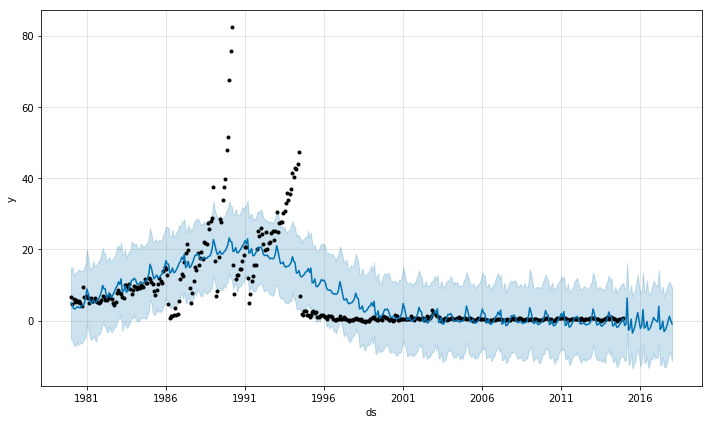

In [13]:
model.plot(fcst)

periods of hyper inflation in brazil (late 80s and mid 90s) might be affecting the forecast and making the uncertainty high.
Let's try it from 1996 onwards, since it the inflation rate is more stable

In [14]:
train = data[(data["ds"] >= "1996-01-01") & (data["ds"] < "2015-01-01")]

# initalize and fit model
model = Prophet()
model.fit(train)

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


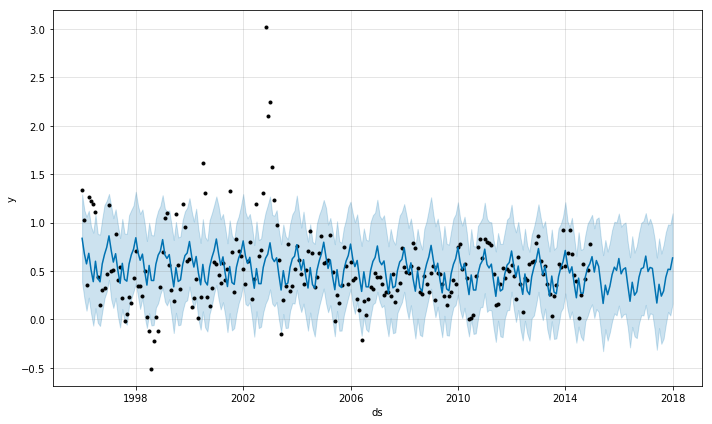

In [15]:
future = model.make_future_dataframe(periods=37, freq="M")
fcst = model.predict(future)
model.plot(fcst)

to continue...